# Discovering Hidden Personality Patterns using Unsupervised Learning
### Final Project – Unsupervised Machine Learning

**By:** Sushma Suresh  
**Dataset:** Big Five Personality Test (Kaggle)  
**Objective:** Identify personality clusters based on Big Five traits using PCA and K-Means.

**GitHub Repo** : https://github.com/sushmahss555/unsupervised_model_big_five_personality.git 

## 1. Problem Description

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

The **Big Five Personality Test** measures five core traits:

**O** - **Openness to Experience** – curiosity, creativity  
**C** - **Conscientiousness** – organization, responsibility  
**E** - **Extraversion** – sociability, assertiveness  
**A** - **Agreeableness** – kindness, cooperation  
**N** - **Neuroticism** – emotional instability  

**Goal:**  
Use *unsupervised learning* to uncover hidden personality clusters from test responses, without predefined labels.  
This helps understand how people group naturally based on their personality patterns.


## 2. Import Libraries

Standard Python libraries for data science were imported, including pandas and numpy for manipulation, matplotlib and seaborn for visualization, and sklearn modules like MinMaxScaler, PCA, and KMeans for modeling.

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preprocessing and modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 3. Dataset Overview 

The analysis utilizes the [Big Five Personality Test](https://www.kaggle.com/datasets/tunguz/big-five-personality-test) dataset, sourced from Kaggle , which contains **1,015,342** questionnaire answers collected online by [Open Psychometrics](https://openpsychometrics.org/tests/IPIP-BFFM/) between 2016 and 2018. The test is based on the Big-Five Factor Markers from the IPIP.

### Response Scale

The core personality questions are recorded on a 5-point Likert scale:

* **1 = Disagree**
* **3 = Neutral**
* **5 = Agree**

### Variables Summary

The dataset contains $\mathbf{110}$ columns, which can be grouped into the following categories:

| Description | Example Columns | Count |
| :--- | :--- | :--- |
| **Core Personality Score** (1-5 scale) for questions relating to the Big Five traits (Extraversion, Neuroticism, Agreeableness, Conscientiousness, Openness). | `EXT1`, `AGR5`, `OPN10` | 50 |
| **Time Spent** (in milliseconds) answering the corresponding question. | `EXT1_E`, `AGR5_E` | 50 |
| Timestamp when the survey was started. | - | 1 |
| Time (seconds) spent on various survey stages (intro, test, end). | `introelapse`, `testelapse` | 3 |
| User's screen resolution (width and height in pixels). | `screenw`, `screenh` | 2 |
| Number of records from the user's IP address. | `IPC` | 1 |
| Country (technically determined). | `country` | 1 |
| Approximate latitude and longitude (with errors). | `lat_appx_*`, `long_appx_*` | 2 |

**Total Columns: 110**


## 4. Data Preparation

- Load the data to dataframe .

- Irrelevant columns, such as the time spent on each question and technical demographic data, were dropped.

- Any rows containing missing values were removed, resulting in a large clean dataset of over 1 million participants.

In [3]:
# Load the dataset (update path as needed)
df_raw = pd.read_csv('../input/big-five-personality-test/IPIP-FFM-data-8Nov2018/data-final.csv', sep='\t')
df = df_raw.copy()

df.drop(df.columns[50:107], axis=1, inplace=True)
df.drop(df.columns[51:], axis=1, inplace=True)

df.info()

#Check Missing Value
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

## 5. Exploratory Data Analysis (EDA)

- Plot of data distrubution accross the countries
- Plot of data distrubution accross O - Openness to Experience ( OPN columns )
- Plot of data distrubution accross C - Conscientiousness (CSN columns )
- Plot of data distrubution accross E - Extraversion  (EXT columns )
- Plot of data distrubution accross A - Agreeableness (ARG columns )
- Plot of data distrubution accross N - Neuroticism (EST columns )


Apply the reverse-scoring transformation to the identified columns

df[col] = 5 - df[col] 

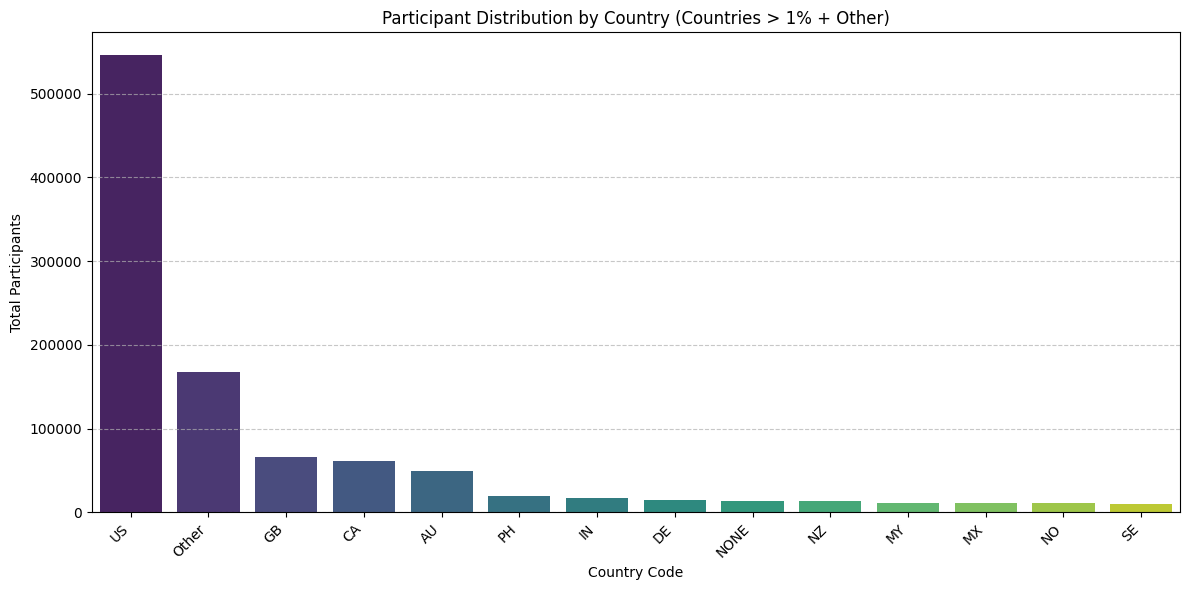

In [4]:
## Plot of data distrubution accross the countries 

country_freq = df['country'].value_counts(normalize=True)

# if a country's proportion is > 0.01 (1%), keep its name, assign 'Other'.
simplified_countries = df['country'].where(
    df['country'].map(country_freq) > 0.01,
    'Other'
)

# 3. Recalculate counts and percentages for the final DataFrame
final_countries = (
    simplified_countries.value_counts()
    .rename_axis('country')
    .reset_index(name='count')
)
final_countries['percentage'] = (final_countries['count'] / final_countries['count'].sum()) * 100


plt.figure(figsize=(12, 6))
plot_data = final_countries.sort_values(by='count', ascending=False)

sns.barplot(
    data=plot_data,
    x='country',
    y='count',
    palette='viridis'
)
plt.title('Participant Distribution by Country (Countries > 1% + Other)')
plt.ylabel('Total Participants')
plt.xlabel('Country Code')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

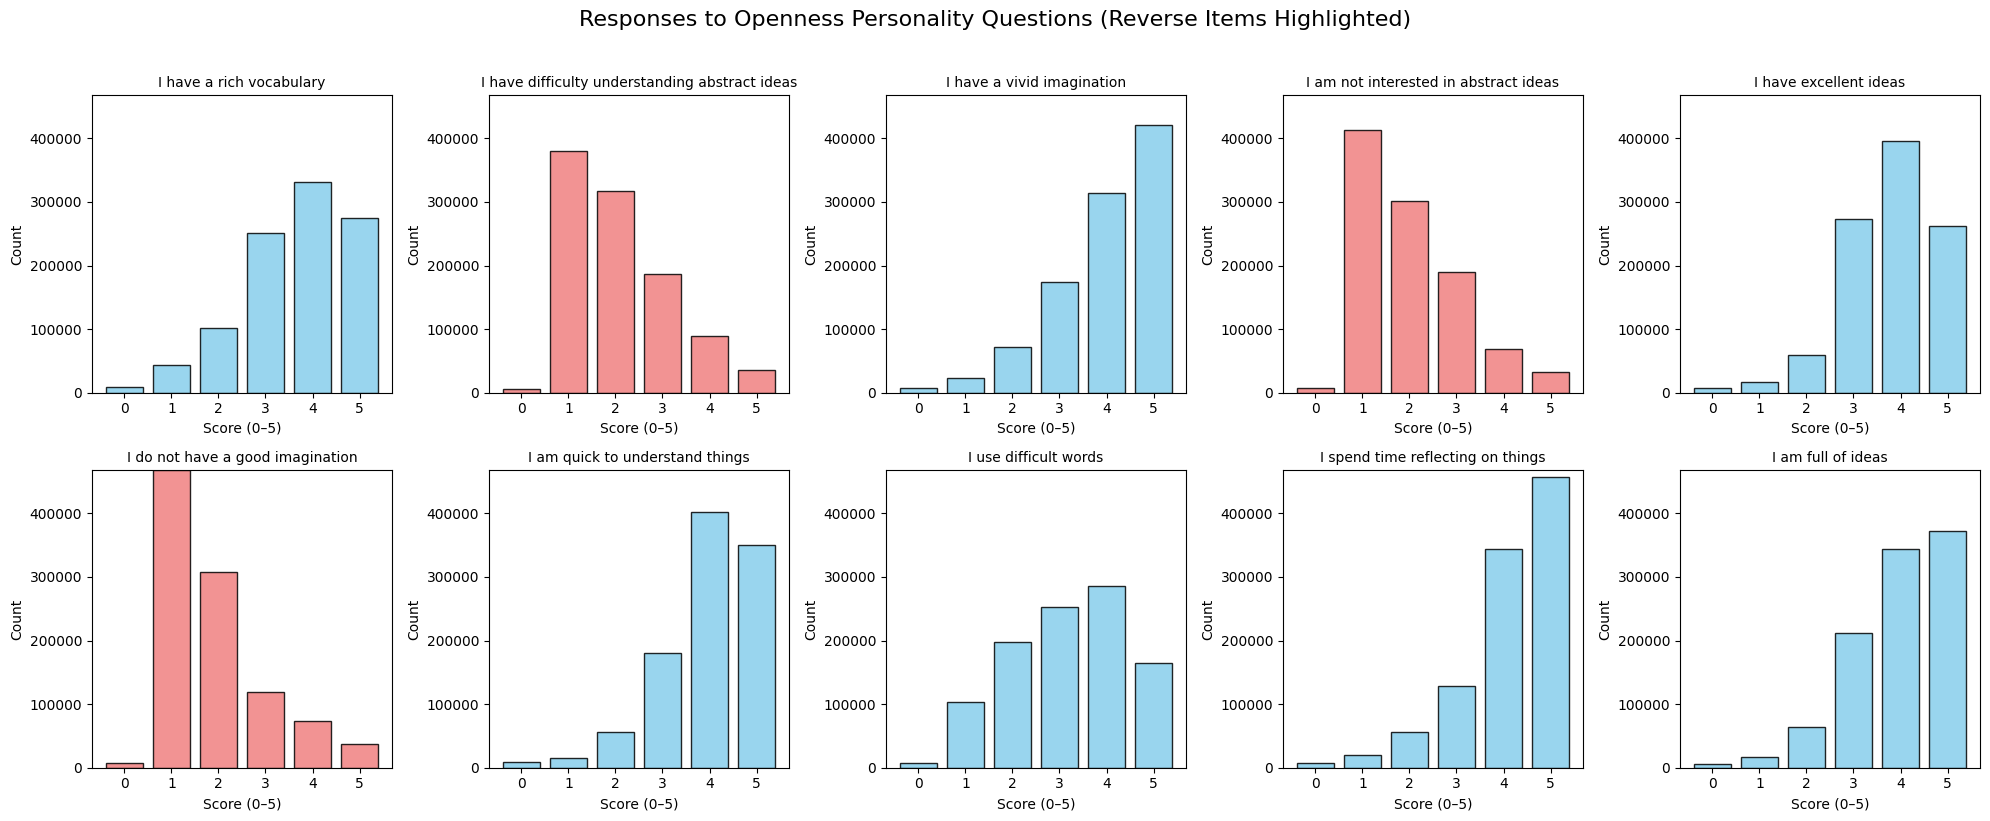

In [8]:
# Define OPN columns
opn_cols = ['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']

# Corresponding question labels
questions = [
    "I have a rich vocabulary",
    "I have difficulty understanding abstract ideas",
    "I have a vivid imagination",
    "I am not interested in abstract ideas",
    "I have excellent ideas",
    "I do not have a good imagination",
    "I am quick to understand things",
    "I use difficult words",
    "I spend time reflecting on things",
    "I am full of ideas"
]

# Reverse-scored columns
reverse_cols = ['OPN2', 'OPN4', 'OPN6']
for col in reverse_cols:
    df[col] = 5 - df[col]
    
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
max_count = max(df[opn_cols].apply(lambda x: x.value_counts().max()))
for i, col in enumerate(opn_cols):
    counts = df[col].value_counts().sort_index()
    color = 'lightcoral' if col in reverse_cols else 'skyblue'  
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.85)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)
plt.suptitle("Responses to Openness Personality Questions (Reverse Items Highlighted)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


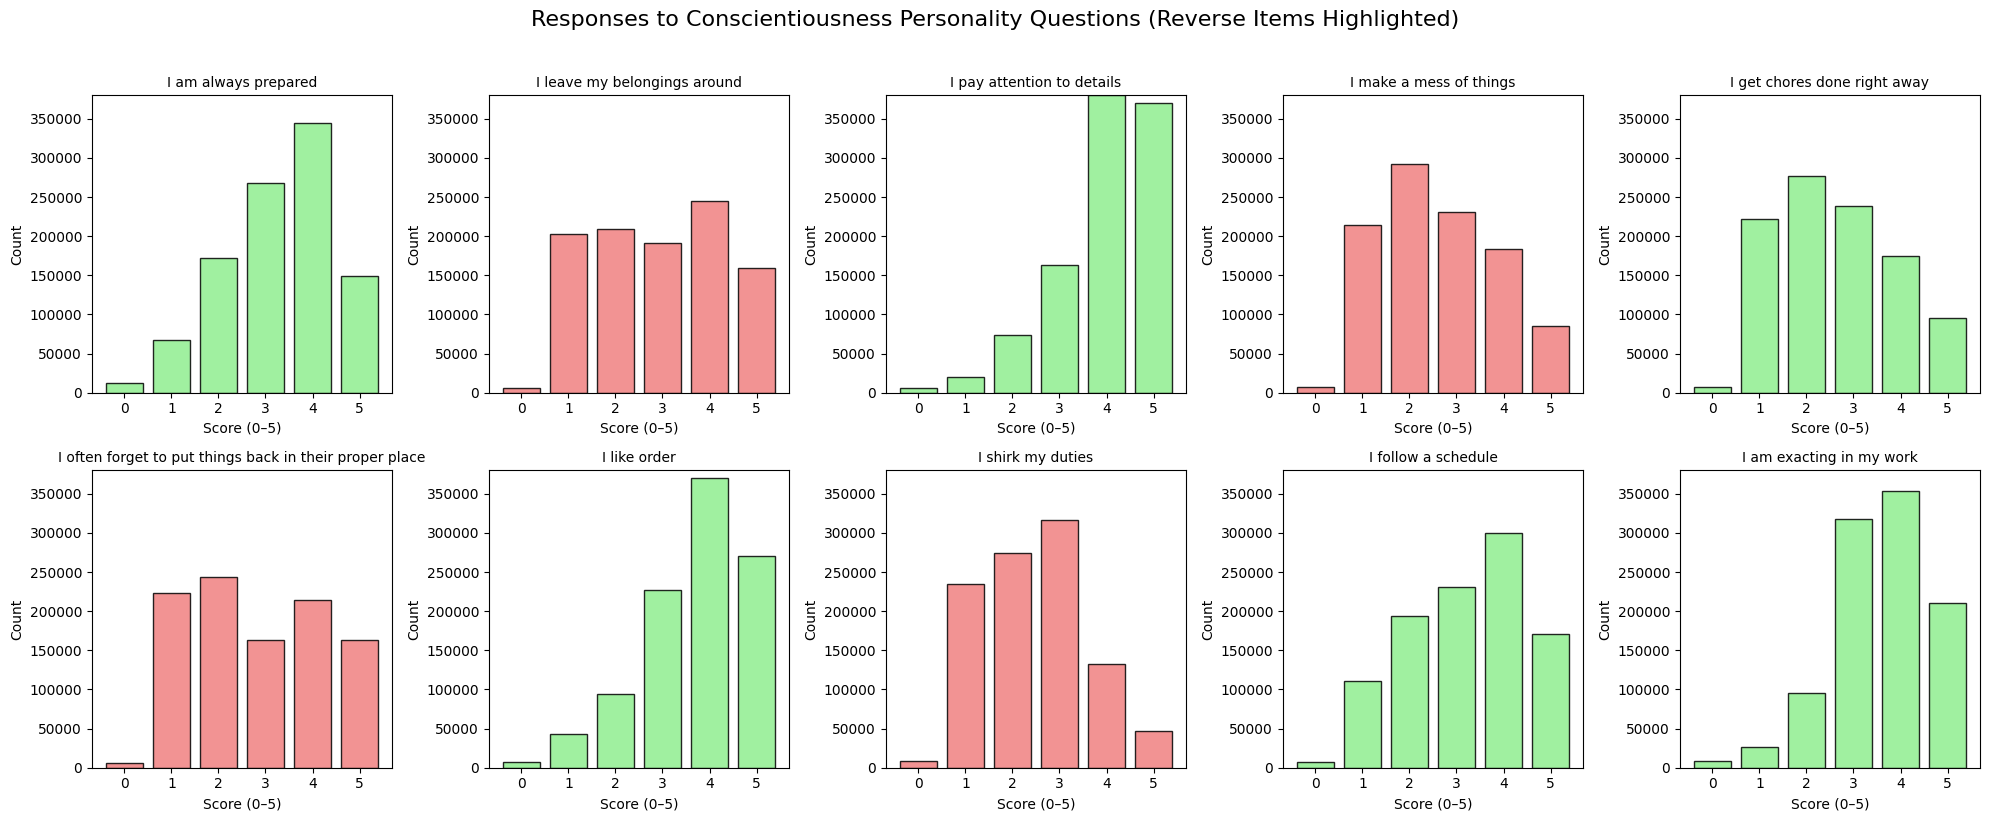

In [12]:
csn_cols = ['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
questions = [
    "I am always prepared",                     
    "I leave my belongings around",             
    "I pay attention to details",               
    "I make a mess of things",                  
    "I get chores done right away",             
    "I often forget to put things back in their proper place",  
    "I like order",                             
    "I shirk my duties",                         
    "I follow a schedule",                      
    "I am exacting in my work"                  
]

# Reverse-scored items
reverse_cols = ['CSN2', 'CSN4', 'CSN6', 'CSN8']
for col in reverse_cols:
    df[col] = 5 - df[col]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
max_count = max(df[csn_cols].apply(lambda x: x.value_counts().max()))
for i, col in enumerate(csn_cols):
    counts = df[col].value_counts().sort_index()
    color = 'lightcoral' if col in reverse_cols else 'lightgreen' 
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.85)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)
plt.suptitle("Responses to Conscientiousness Personality Questions (Reverse Items Highlighted)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


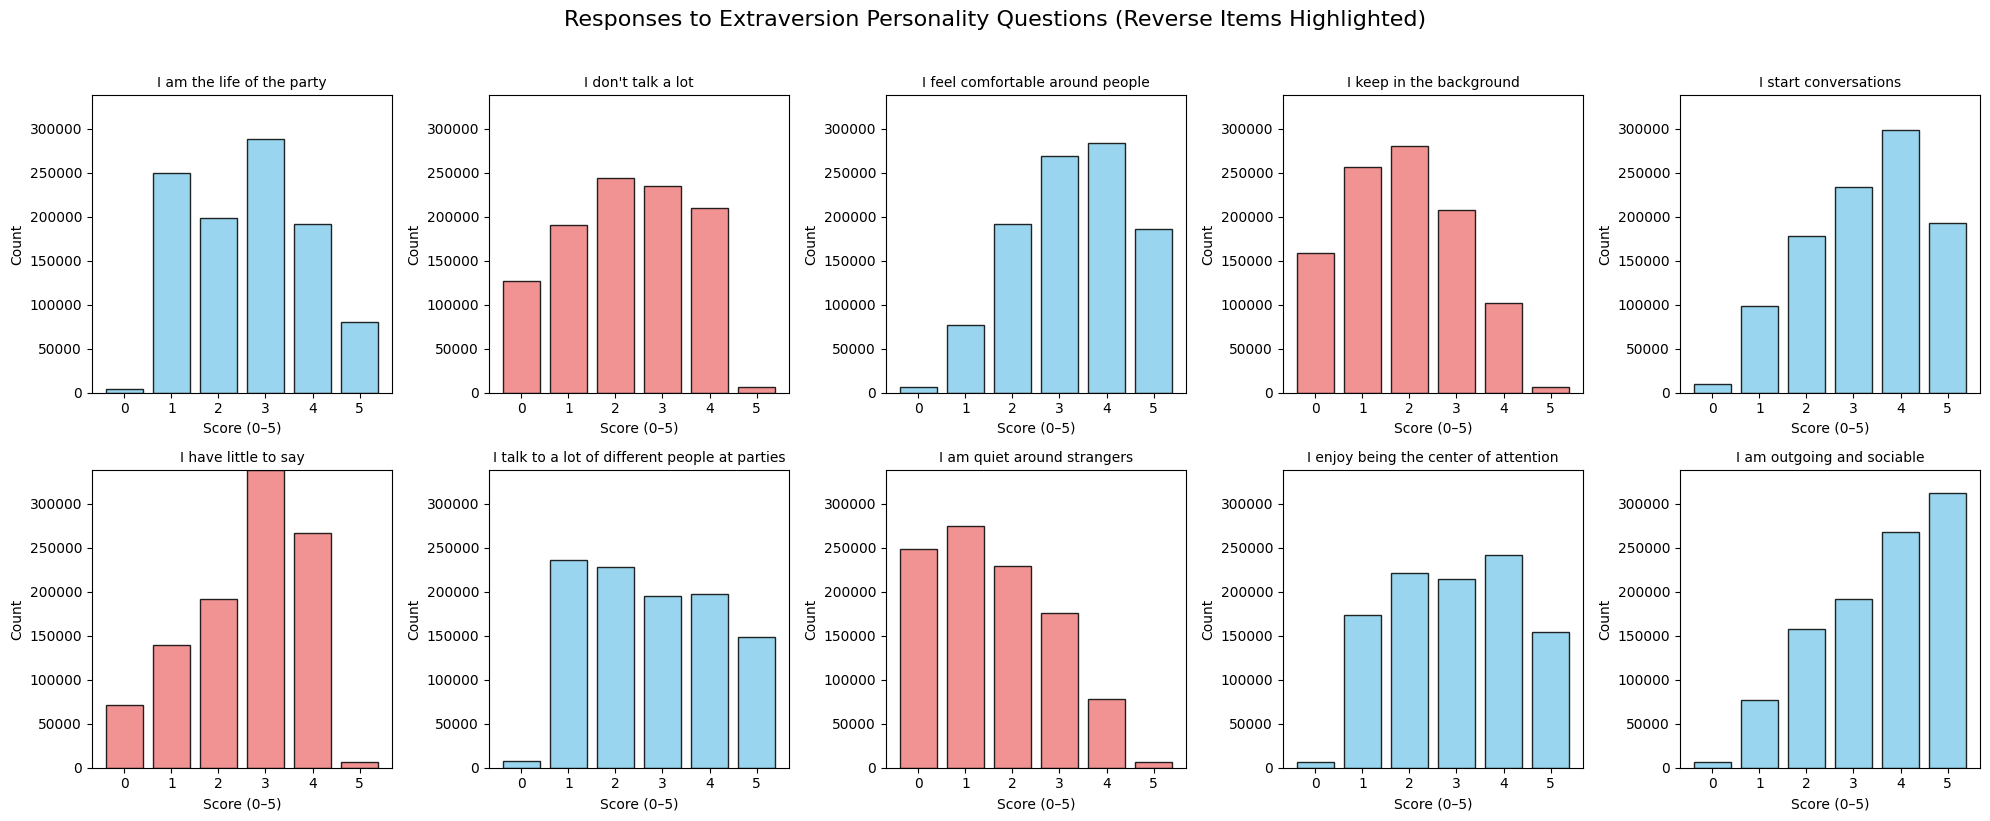

In [13]:
ext_cols = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']

questions = [
    "I am the life of the party",                     
    "I don't talk a lot",                            
    "I feel comfortable around people",               
    "I keep in the background",                      
    "I start conversations",                         
    "I have little to say",                          
    "I talk to a lot of different people at parties", 
    "I am quiet around strangers",                    
    "I enjoy being the center of attention",          
    "I am outgoing and sociable"                     
]

# Reverse-scored items
reverse_cols = ['EXT2', 'EXT4', 'EXT6', 'EXT8']
for col in reverse_cols:
    df[col] = 5 - df[col]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
max_count = max(df[ext_cols].apply(lambda x: x.value_counts().max()))
for i, col in enumerate(ext_cols):
    counts = df[col].value_counts().sort_index()
    color = 'lightcoral' if col in reverse_cols else 'skyblue'  
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.85)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)
plt.suptitle("Responses to Extraversion Personality Questions (Reverse Items Highlighted)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


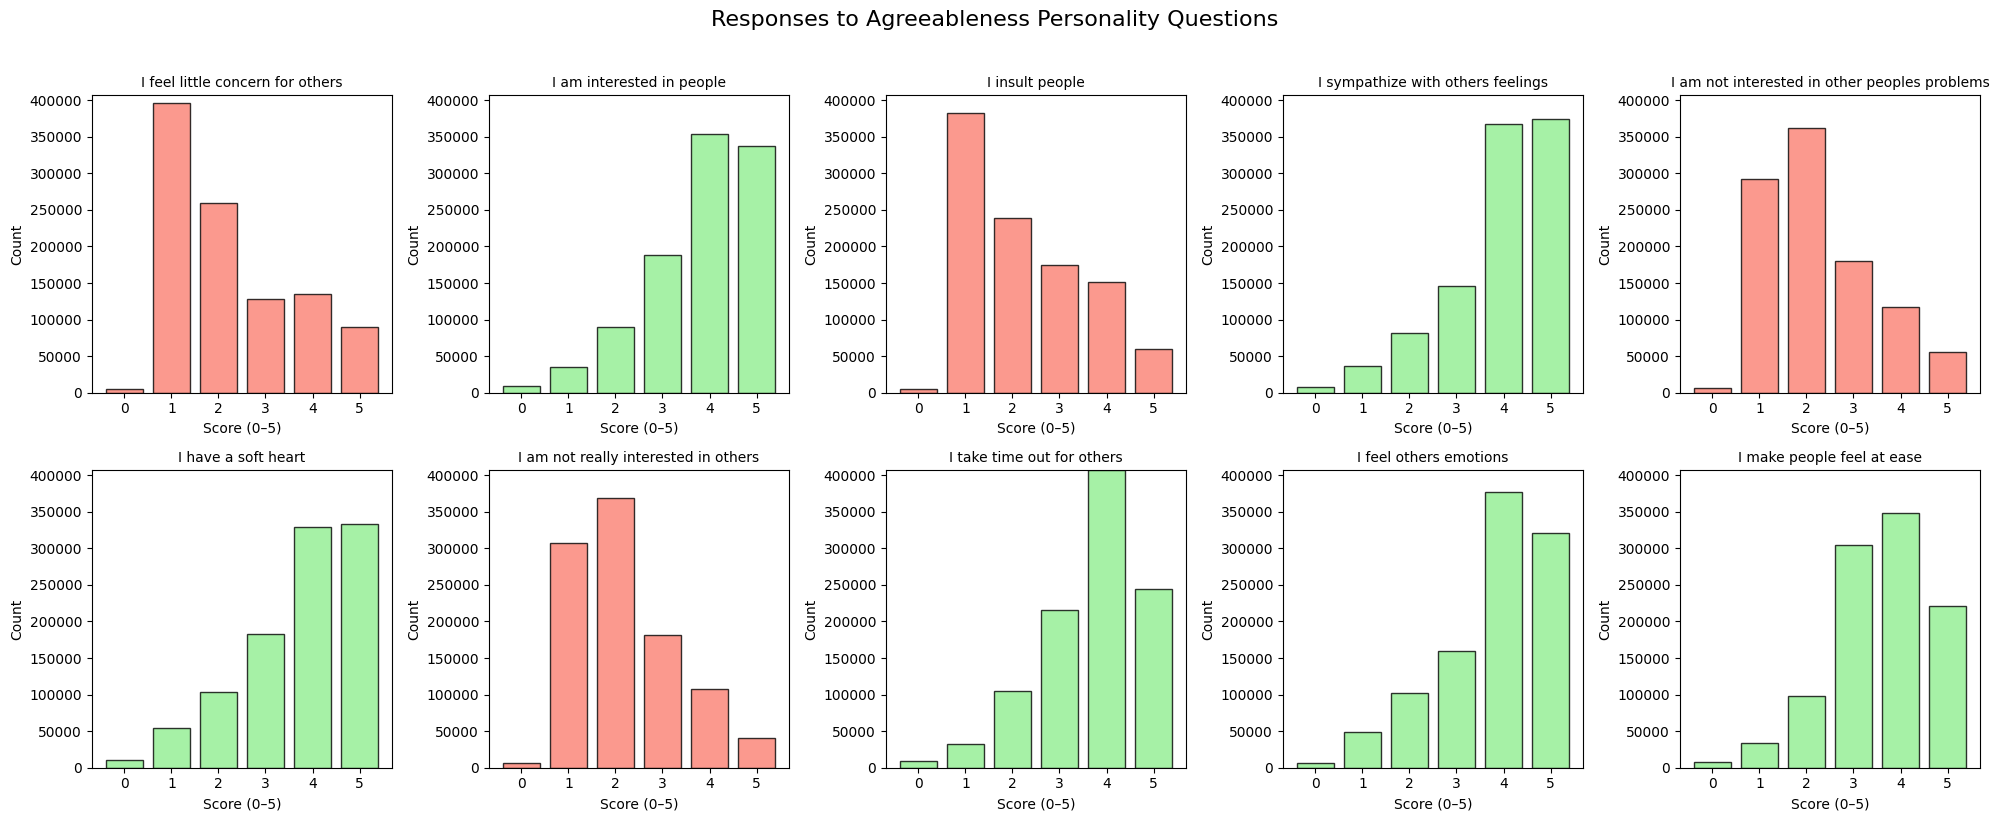

In [17]:
# AGR columns
agr_cols = ['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']

questions = [
    "I feel little concern for others",       
    "I am interested in people",           
    "I insult people",                       
    "I sympathize with others feelings",      
    "I am not interested in other peoples problems", 
    "I have a soft heart",                   
    "I am not really interested in others",  
    "I take time out for others",             
    "I feel others emotions",                 
    "I make people feel at ease"             
]

# Reverse-scored items
reverse_cols= ['AGR1','AGR3','AGR5','AGR7']
for col in reverse_cols:
    df[col] = 5 - df[col]


fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
max_count = max(df[agr_cols].apply(lambda x: x.value_counts().max()))
for i, col in enumerate(agr_cols):
    counts = df[col].value_counts().sort_index()
    color = 'salmon' if col in reverse_cols else 'lightgreen'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)

plt.suptitle("Responses to Agreeableness Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

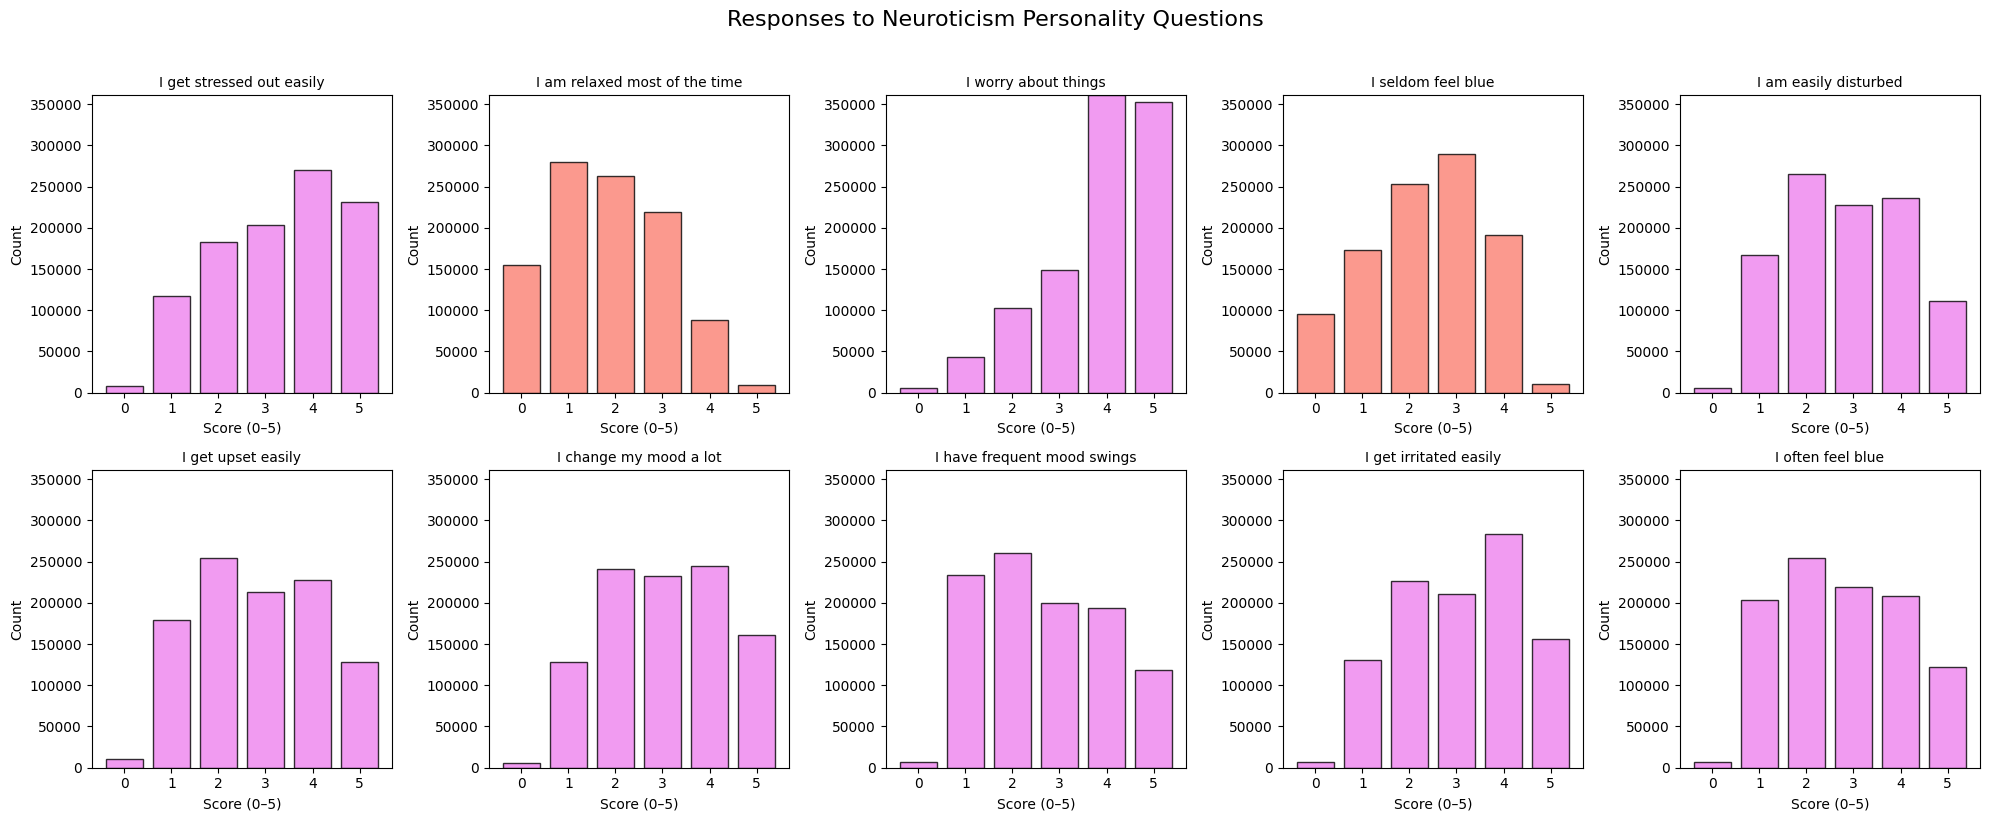

In [18]:
# EST/NEU columns
neu_cols = ['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']

questions = [
    "I get stressed out easily",       
    "I am relaxed most of the time",   
    "I worry about things",           
    "I seldom feel blue",             
    "I am easily disturbed",          
    "I get upset easily",             
    "I change my mood a lot",          
    "I have frequent mood swings",     
    "I get irritated easily",          
    "I often feel blue"                
]

reverse_cols = ['EST2','EST4']
for col in reverse_cols:
    df[col] = 5 - df[col]
    

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
max_count = max(df[neu_cols].apply(lambda x: x.value_counts().max()))
for i, col in enumerate(neu_cols):
    counts = df[col].value_counts().sort_index()
    color = 'salmon' if col in reverse_cols else 'violet'
    axes[i].bar(counts.index, counts.values, color=color, edgecolor='black', alpha=0.8)
    axes[i].set_title(questions[i], fontsize=10)
    axes[i].set_xlabel("Score (0–5)")
    axes[i].set_ylabel("Count")
    axes[i].set_ylim(0, max_count + 5)
plt.suptitle("Responses to Neuroticism Personality Questions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 6. Data Processing 

The dataset contains over a million rows and includes a non-numeric 'country' column. To efficiently prepare the data for K-Means and PCA, we will scale all numeric columns. 

- 6.1 Data Copy
- 6.2 Drop the Country column 
- 6.3 Scale the Numeric Features (MinMaxScaler)

In [19]:
df_data = df.copy()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1013481 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013481 non-null  float64
 1   EXT2     1013481 non-null  float64
 2   EXT3     1013481 non-null  float64
 3   EXT4     1013481 non-null  float64
 4   EXT5     1013481 non-null  float64
 5   EXT6     1013481 non-null  float64
 6   EXT7     1013481 non-null  float64
 7   EXT8     1013481 non-null  float64
 8   EXT9     1013481 non-null  float64
 9   EXT10    1013481 non-null  float64
 10  EST1     1013481 non-null  float64
 11  EST2     1013481 non-null  float64
 12  EST3     1013481 non-null  float64
 13  EST4     1013481 non-null  float64
 14  EST5     1013481 non-null  float64
 15  EST6     1013481 non-null  float64
 16  EST7     1013481 non-null  float64
 17  EST8     1013481 non-null  float64
 18  EST9     1013481 non-null  float64
 19  EST10    1013481 non-null  float64
 20  AGR1   

In [20]:
# 1. Drop only the 'country' column to select all numeric features
df_numeric = df_data.drop(columns=['country'])
numeric_columns = list(df_numeric.columns)

# 2. Initialize and apply the scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_numeric)

# 3. Convert the scaled NumPy array back to a Pandas DataFrame
df_data_scaled = pd.DataFrame(scaled_data, columns=numeric_columns)

## 7. Feature Engineering and Optimal Cluster Selection

- Trait Score Calculation: Compute the final five personality trait scores by averaging the $10$ corresponding question scores for each participant.
- Elbow Method: Determine the optimal number of clusters ($k$) for the K-Means algorithm.

 

* **7.1 .Calculate the Final 5 Trait Scores**
  
 We calculate the final score for each of the five personality traits by taking the mean of the $10$ corresponding question scores. These five scores will be the features used for clustering.

In [22]:
# --- Calculate the Final 5 Trait Scores ---
ext_cols = [f'EXT{i}' for i in range(1, 11)]
est_cols = [f'EST{i}' for i in range(1, 11)]
agr_cols = [f'AGR{i}' for i in range(1, 11)]
csn_cols = [f'CSN{i}' for i in range(1, 11)]
opn_cols = [f'OPN{i}' for i in range(1, 11)]

df_final = pd.DataFrame()
df_final['Extraversion'] = df_data_scaled[ext_cols].mean(axis=1)
df_final['Neuroticism'] = df_data_scaled[est_cols].mean(axis=1)
df_final['Agreeableness'] = df_data_scaled[agr_cols].mean(axis=1)
df_final['Conscientiousness'] = df_data_scaled[csn_cols].mean(axis=1)
df_final['Openness'] = df_data_scaled[opn_cols].mean(axis=1)

print("Trait Scores Calculated. Head of the 5-Trait DataFrame:")
print(df_final.head())

Trait Scores Calculated. Head of the 5-Trait DataFrame:
   Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
0          0.76         0.44           0.62               0.64      0.66
1          0.40         0.46           0.64               0.62      0.54
2          0.50         0.48           0.56               0.56      0.62
3          0.48         0.54           0.64               0.54      0.62
4          0.54         0.34           0.60               0.64      0.72


* **7.2.Determine Optimal $k$ using the Elbow Method**
 
  The Elbow Method helps us find the optimal number of clusters ($k$) by minimizing the Inertia (the sum of squared distances of samples to their closest cluster center). The "elbow" point, where the rate of decrease in inertia sharply changes, suggests the best $k$

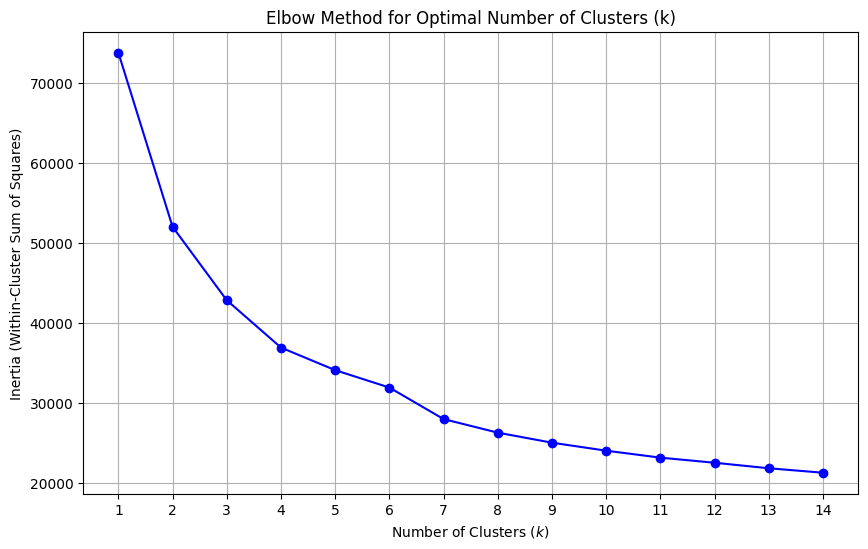

In [28]:
# Perform the Elbow Method ---
X = df_final[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

inertia = []
K_range = range(1, 15)

# Loop through k values and calculate inertia
for k in K_range:
    # Set n_init to 'auto' to avoid warnings in modern sklearn versions
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# --- 4. Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal Number of Clusters (k)')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## 8.Clustering, Analysis, and Interpretation

Based on the previous Elbow Method analysis (which suggested an optimal $k$ value), we now apply the K-Means algorithm to partition the data. We proceed with the $k=3$ clusters.

* **8.1. Run Final K-Means Clustering**
  We fit the K-Means model on the $5$ personality trait scores and assign the resulting cluster label to each participant.
* **8.2. Calculate and Analyze Cluster Mean Scores**
  To understand the profile of each cluster, we calculate the average score for each of the five personality traits within that cluster.
* **8.3. Visualize Cluster Profiles**
  The mean scores are visualized using a grouped bar chart. This allows for easy comparison of the relative strengths and weaknesses across the five traits for each of the discovered personality clusters.

Cluster Mean Trait Scores:
         Extraversion  Neuroticism  Agreeableness  Conscientiousness  Openness
Cluster                                                                       
0            0.652912     0.660837       0.658633           0.645185  0.670944
1            0.567176     0.393079       0.615458           0.602555  0.643189
2            0.393634     0.687537       0.623248           0.630408  0.647978


<Figure size 1200x700 with 0 Axes>

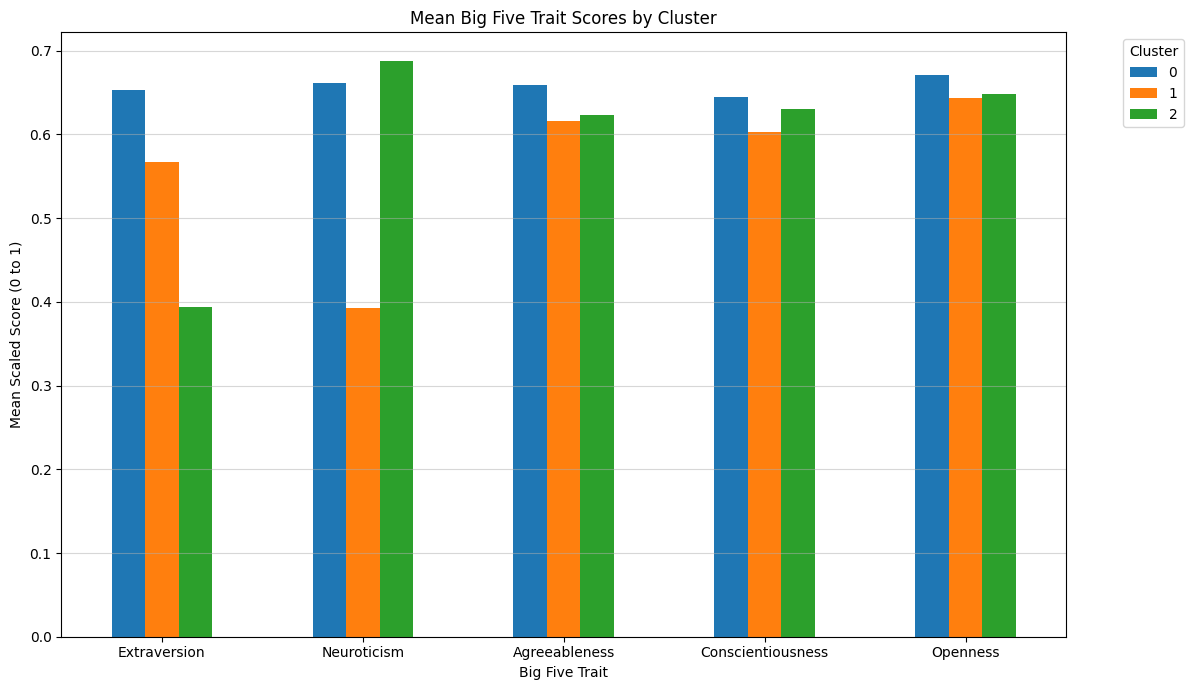

In [29]:
X = df_final[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]

# 8.1Run K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
predictions = kmeans.fit_predict(X)
df_final['Cluster'] = predictions

# 8.2Calculate and Analyze Cluster Mean Score
cluster_means = df_final.groupby('Cluster')[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()

print("Cluster Mean Trait Scores:")
print(cluster_means)

# 8.3. Visualize Cluster Profiles
plt.figure(figsize=(12, 7))
ax = cluster_means.T.plot(kind='bar', figsize=(12, 7)) 
plt.title('Mean Big Five Trait Scores by Cluster')
plt.ylabel('Mean Scaled Score (0 to 1)')
plt.xlabel('Big Five Trait')
plt.xticks(rotation=0)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

**Interpretation**
After running the code and viewing the bar chart , We analyze the mean scores to assign descriptive names to each cluster:

| Cluster | Extraversion | Neuroticism | Agreeableness | Conscientiousness | Openness | Interpretation       |
|----------|---------------|--------------|----------------|-------------------|-----------|--------------------------------|
| 0        | High          | Low          | High           | High              | High      | The Spontaneous and Easy-Going       |
| 1        | Low           | High         | Low            | Low               | Low       |  The Social and Adventurous       |
| 2        | Medium        | Medium       | Medium         | Medium            | High      | The Dependable and Well-Adjusted    |


## 9. Cluster Validation and Size Distribution

After successfully running the K-Means algorithm and obtaining cluster assignments, the next step is to examine the size and balance of the resulting clusters. This helps validate the clustering result; unbalanced clusters might suggest an issue with the chosen $k$ or the features.

**9.1. Calculate Cluster Sizes and Percentages**
We use the value_counts() function to determine how many participants belong to each cluster ID and then calculate the percentage breakdown.

**9.2. Visualize Cluster Sizes**
A bar plot is generated to provide a clear, visual representation of the distribution of participants across the three identified personality clusters. Annotations are added to show the percentage of the sample that falls into each group.


Cluster Counts:
Cluster
0    306272
1    371016
2    336193
Name: count, dtype: int64

Cluster Percentages:
Cluster
0    30.219807
1    36.608086
2    33.172107
Name: count, dtype: float64


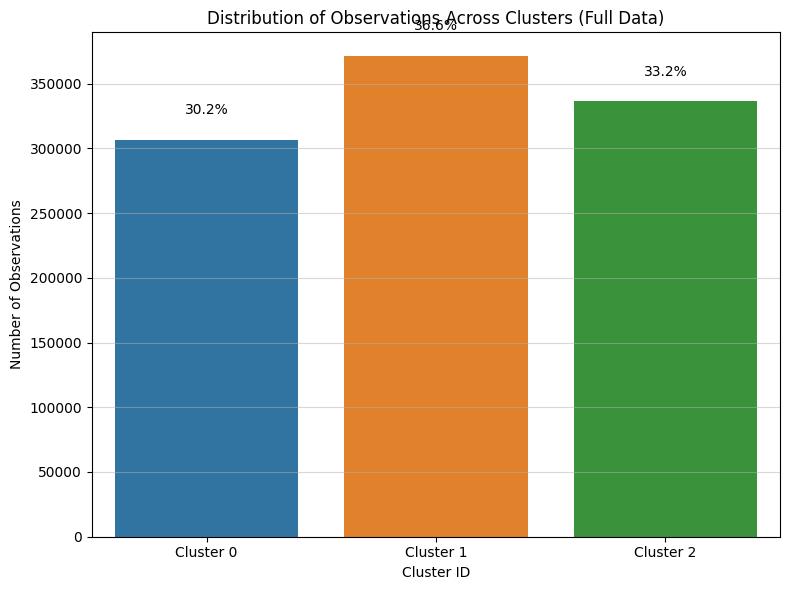

In [30]:
# 9.1. Calculate Cluster Sizes (Counts)
cluster_counts = df_final['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / cluster_counts.sum()) * 100

print("Cluster Counts:")
print(cluster_counts)
print("\nCluster Percentages:")
print(cluster_percentages)

# 9.2. Visualize Cluster Sizes
cluster_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values, 
    palette=cluster_colors 
)
plt.title('Distribution of Observations Across Clusters (Full Data)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Observations')
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.grid(axis='y', alpha=0.5)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percentage = cluster_percentages.iloc[i]
    ax.text(p.get_x() + p.get_width()/2.,
            height + 20000, 
            f'{percentage:.1f}%',
            ha="center",
            fontsize=10)

plt.tight_layout()
plt.show()

## 10. Interpretation of the Personality Clusters

The analysis focuses on which traits are distinctly **High** (tall bars) or **Low** (short bars) for each cluster, allowing us to assign descriptive names to the three personality profiles found in the data.

### 1. <span style="color:blue;">Cluster 0: The Spontaneous and Easy-Going (Blue)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Conscientiousness** | **Lowest** bar among all traits/clusters. |
| **All Others** | Near average. |
| **Profile** | Individuals who are **easy-going, impulsive, or careless** due to their low score in Conscientiousness. They are otherwise balanced in social, emotional, and cognitive traits. |

### 2. <span style="color:orange;">Cluster 1: The Social and Adventurous (Orange)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Extraversion** | **Highest** bar for this trait across all clusters. |
| **Openness** | **High** bar, suggesting curiosity and creativity. |
| **Profile** | These are the **extroverted, energetic, and intellectually curious** individuals. They thrive on novelty, exploration, and social interaction. |

### 3. <span style="color:green;">Cluster 2: The Dependable and Well-Adjusted (Green)</span>

| Trait Score | Analysis |
| :---: | :---: |
| **Agreeableness** | **Highest** bar for this trait across all clusters. |
| **Conscientiousness** | **High** bar, second highest overall. |
| **Neuroticism** | **Lowest** bar for this trait across all clusters. |
| **Profile** | This is the most **stable and reliable** group. They are highly **organized and supportive** (High CSN, High AGR) while maintaining a calm, secure emotional state (Low Neuroticism). |

---

## 11. Final Project Conclusion

By running the complete pipeline on the full dataset and using the optimal **$\mathbf{k=3}$** value, We successfully discovered three distinct, statistically significant personality patterns, confirming that the Big Five population can be primarily grouped into these three profiles:

1.  **The Spontaneous** (Low Conscientiousness)
2.  **The Adventurous** (High Extraversion and Openness)
3.  **The Dependable** (High Agreeableness and Conscientiousness, Low Neuroticism)

# 12.Impletement the model to check my personality 

1.  **Load Individual Scores:** Import the answers from Big5_Sample_Responses.xlsx.That contains answer for all the 50 questions .

2.  **Scale Raw Data:** Apply the existing `scaler` object (trained on the full dataset) to 50 raw scores. This transforms 1-5 answers into the 0-1 range, ensuring they are comparable to the training data.

3.  **Calculate Final Traits:** Apply the necessary **reverse scoring** to the reversed items (e.g., `EXT2`, `EST4`) and then calculate the average for each of the 5 Big Five traits (Extraversion, Neuroticism, etc.) using the appropriate 10 items for each.

4.  **Predict Cluster ID:** Use the already trained K-Means model (`kmeans`) and its `.predict()` method on 5 calculated trait scores. This returns a single number (`0`, `1`, or `2`), which is your assigned cluster ID.

5.  **Visualize and Interpret:** Map the predicted ID to its descriptive name (e.g., "The Dependable and Well-Adjusted") and generate a bar/line plot showing your 5 individual trait levels (0-1), allowing for a direct visual comparison against the cluster profiles. 



In [31]:
# Constants (REQUIRED for reverse scoring and averaging)
REVERSE_ITEMS = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10', 'EST2', 'EST4', 'EST6', 'EST8', 'EST10',
                 'AGR1', 'AGR3', 'AGR5', 'AGR7', 'AGR9', 'CSN2', 'CSN4', 'CSN6', 'CSN8', 'CSN10',
                 'OPN2', 'OPN4', 'OPN6', 'OPN8', 'OPN10']
TRAIT_COLS = {
    'Extraversion': [f'EXT{i}' for i in range(1, 11)],
    'Neuroticism': [f'EST{i}' for i in range(1, 11)],
    'Agreeableness': [f'AGR{i}' for i in range(1, 11)],
    'Conscientiousness': [f'CSN{i}' for i in range(1, 11)],
    'Openness': [f'OPN{i}' for i in range(1, 11)],
}
ALL_QUESTION_COLS = [f'{t}{i}' for t in ['EXT', 'EST', 'AGR', 'CSN', 'OPN'] for i in range(1, 11)]

CLUSTER_NAMES = {
    0: "The Spontaneous and Easy-Going",
    1: "The Adventurous and Social",
    2: "The Dependable and Well-Adjusted"
}

# ---Execution and Visualization: Find My Personal Cluster ---

# 1. Load Data (Adjust path/format if needed)
PERSONAL_DATA_PATH = '../input/personalitytest/my_personality_test.txt'

my_data=pd.read_excel('/kaggle/input/my-personal-data/Big5_Sample_Responses.xlsx')


# 2. DATA PREPARATION (The Core Logic)

# Step 2a: Scale the raw scores (transform 1-5 to 0-1 based on population)
scaled_data = scaler.transform(my_data) 
df_scaled = pd.DataFrame(scaled_data, columns=ALL_QUESTION_COLS)

# Step 2b: Reverse Scoring (1 - score for reversed items)
df_scores = df_scaled.copy()
df_scores[REVERSE_ITEMS] = 1 - df_scores[REVERSE_ITEMS]

# Step 2c: Calculate Final 5 Trait Scores (Averaging the 10 items per trait)
trait_scores = pd.DataFrame()
for trait, cols in TRAIT_COLS.items():
    trait_scores[trait] = df_scores[cols].mean(axis=1)

# 3. PREDICT CLUSTER
X_predict = trait_scores[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']]
# RENAMED from kmeans_model.predict to use the name 'kmeans' from your main analysis
predicted_cluster = kmeans.predict(X_predict)[0] 


# 4. OUTPUT AND VISUALIZE RESULT
cluster_name = CLUSTER_NAMES.get(predicted_cluster, "UNKNOWN CLUSTER")
trait_scores_flat = trait_scores.iloc[0].round(4)

print(f"Predicted Cluster ID: {predicted_cluster}")
print(f"Personality Type: {cluster_name}")

Predicted Cluster ID: 1
Personality Type: The Adventurous and Social


## Citation

**Dataset:**
- Kaggle dataset [Big Five Personality Test](https://www.kaggle.com/datasets/tunguz/big-five-personality-test)
  

**Reference Material:**
- International Personality Item Pool: A Scientific Collaboratory for the Development of Advanced Measures of Personality Traits and Other Individual Differences. (n.d.). Retrieved from http://ipip.ori.org/
  
**Libraries:**
-  *Scikit-learn: Machine Learning in Python.* Journal of Machine Learning Research, 12, 2825–2830.  
- McKinney, W. (2010). *Data Structures for Statistical Computing in Python.* Proceedings of the 9th Python in Science Conference.  

**Tools:**
- Python 3.10  
- Jupyter Notebook  
- Pandas, NumPy, Seaborn, Matplotlib, Scikit-learn, XGBoost
  
**AI Assistance:**
- Portions of this project’s planning, documentation, and report structuring were supported by *ChatGPT (GPT-5, OpenAI)* to assist with idea organization and explanation clarity.  


**Inspiration:**
- Guided by coursework from the MS-AI Unsupervised Learning module, focusing on applying clustering and dimensionality reduction to psychological datasets.